In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, auc, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

import statistics

# Loading Data

In [20]:
data = pd.read_csv('./data_processed/data_first_record_with_commorbidities_.csv', index_col=0)
data.fillna(data.mean(), inplace=True)
los_mean = data.los.mean()

In [21]:
data = data[data.die_in_icu == 1]
data.drop(columns=['die_in_icu'], inplace=True)

print(data.shape)

(139, 32)


In [22]:
# data.los = (data.los >= np.mean(data.los)).astype(int)
data.los = (data.los >= los_mean).astype(int)

In [23]:
X = data.loc[:, data.columns != 'los']
y = data.loc[:, data.columns == 'los']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)

In [24]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [25]:
# res = pd.DataFrame(model.coef_.reshape(-1), index=X.columns, columns=['Coefficient'])
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100.0}")

cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 69.04761904761905
[[27  3]
 [10  2]]


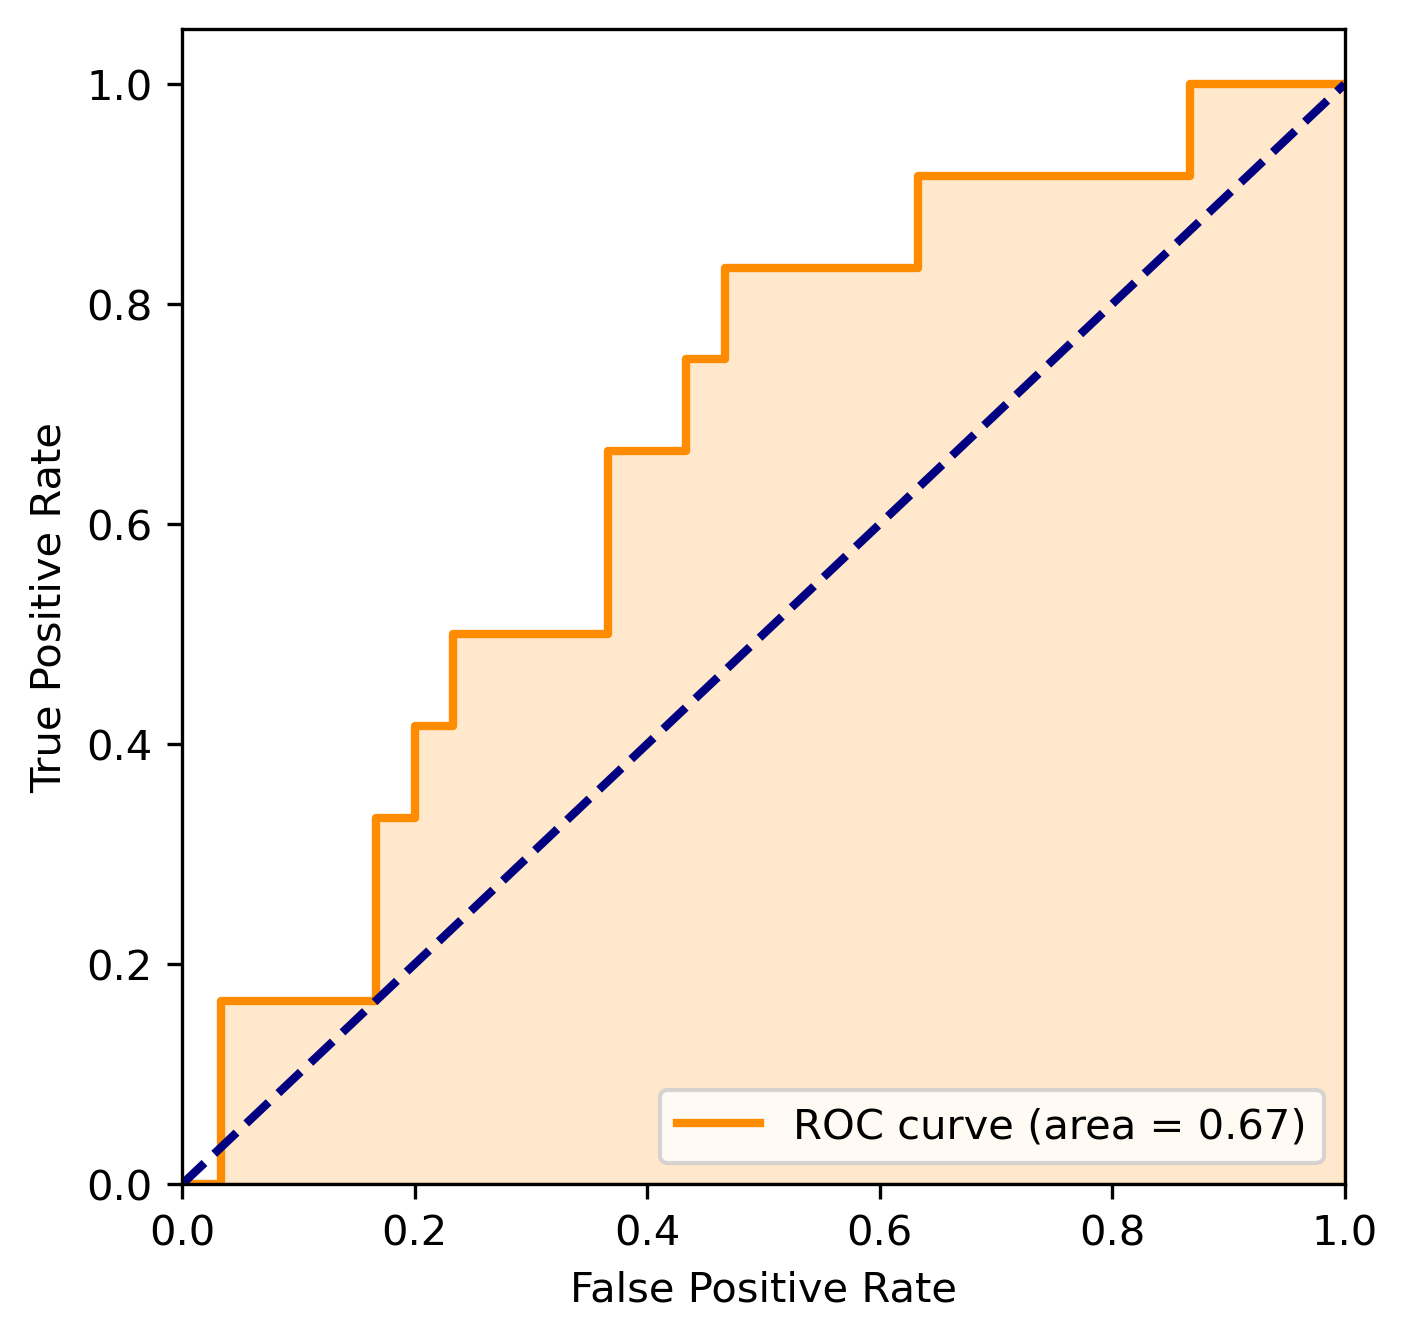

In [26]:
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=300)

plt.plot(fpr, 
        tpr, 
        color='darkorange', 
        lw=2, 
        label=f'ROC curve (area = {roc_auc:.2f})')

plt.fill_between(fpr, tpr, color='darkorange', alpha=0.2)  # alpha 参数控制填充颜色的透明度


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [27]:
for random_seed in range(0, 1000): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    

    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    
    roc_auc = auc(fpr, tpr)

    print(f"Seed: {random_seed} acc: {accuracy * 100.0} auc: {roc_auc}")

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 0 acc: 50.0 auc: 0.6326530612244898
Seed: 1 acc: 53.57142857142857 auc: 0.44999999999999996
Seed: 2 acc: 60.71428571428571 auc: 0.4598930481283422
Seed: 3 acc: 67.85714285714286 auc: 0.4327485380116959
Seed: 4 acc: 71.42857142857143 auc: 0.69375
Seed: 5 acc: 67.85714285714286 auc: 0.6388888888888888
Seed: 6 acc: 57.14285714285714 auc: 0.6307692307692309
Seed: 7 acc: 57.14285714285714 auc: 0.6417112299465241
Seed: 8 acc: 60.71428571428571 auc: 0.5146198830409356
Seed: 9 acc: 64.28571428571429 auc: 0.5722222222222222
Seed: 10 acc: 57.14285714285714 auc: 0.5730994152046784
Seed: 11 acc: 75.0 auc: 0.5227272727272727
Seed: 12 acc: 64.28571428571429 auc: 0.475
Seed: 13 acc: 64.28571428571429 auc: 0.4093567251461988
Seed: 14 acc: 57.14285714285714 auc: 0.4608695652173913
Seed: 15 acc: 60.71428571428571 auc: 0.5666666666666667
Seed: 16 acc: 67.85714285714286 auc: 0.6666666666666666
Seed: 17 acc: 42.857142857142854 auc: 0.3802083333333333
Seed: 18 acc: 71.42857142857143 auc: 0.52046783625

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 19 acc: 57.14285714285714 auc: 0.5204678362573099
Seed: 20 acc: 82.14285714285714 auc: 0.7878787878787878
Seed: 21 acc: 78.57142857142857 auc: 0.6124999999999999
Seed: 22 acc: 64.28571428571429 auc: 0.525
Seed: 23 acc: 64.28571428571429 auc: 0.4625
Seed: 24 acc: 75.0 auc: 0.7165775401069518
Seed: 25 acc: 64.28571428571429 auc: 0.6190476190476191
Seed: 26 acc: 53.57142857142857 auc: 0.26041666666666663
Seed: 27 acc: 71.42857142857143 auc: 0.6900584795321638
Seed: 28 acc: 71.42857142857143 auc: 0.5906432748538011
Seed: 29 acc: 78.57142857142857 auc: 0.7375
Seed: 30 acc: 71.42857142857143 auc: 0.6938775510204082
Seed: 31 acc: 53.57142857142857 auc: 0.6145833333333334
Seed: 32 acc: 60.71428571428571 auc: 0.5777777777777778
Seed: 33 acc: 60.71428571428571 auc: 0.5743589743589743
Seed: 34 acc: 67.85714285714286 auc: 0.5964912280701754
Seed: 35 acc: 75.0 auc: 0.7651515151515151
Seed: 36 acc: 50.0 auc: 0.65625
Seed: 37 acc: 57.14285714285714 auc: 0.4277777777777778
Seed: 38 acc: 57.14285

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 60 acc: 64.28571428571429 auc: 0.4318181818181818
Seed: 61 acc: 57.14285714285714 auc: 0.5499999999999999
Seed: 62 acc: 67.85714285714286 auc: 0.5146198830409356
Seed: 63 acc: 64.28571428571429 auc: 0.5055555555555555
Seed: 64 acc: 60.71428571428571 auc: 0.6515151515151515
Seed: 65 acc: 60.71428571428571 auc: 0.25625
Seed: 66 acc: 64.28571428571429 auc: 0.6149732620320856
Seed: 67 acc: 60.71428571428571 auc: 0.47222222222222227
Seed: 68 acc: 75.0 auc: 0.6938775510204082
Seed: 69 acc: 67.85714285714286 auc: 0.6666666666666666
Seed: 70 acc: 60.71428571428571 auc: 0.5166666666666667
Seed: 71 acc: 71.42857142857143 auc: 0.8062499999999999
Seed: 72 acc: 50.0 auc: 0.4385026737967914
Seed: 73 acc: 60.71428571428571 auc: 0.6417112299465241
Seed: 74 acc: 57.14285714285714 auc: 0.6820512820512821
Seed: 75 acc: 82.14285714285714 auc: 0.7894736842105263
Seed: 76 acc: 60.71428571428571 auc: 0.4333333333333334
Seed: 77 acc: 60.71428571428571 auc: 0.5260416666666666


C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 78 acc: 50.0 auc: 0.453125
Seed: 79 acc: 53.57142857142857 auc: 0.6042780748663101
Seed: 80 acc: 64.28571428571429 auc: 0.6198830409356725
Seed: 81 acc: 78.57142857142857 auc: 0.8503401360544218
Seed: 82 acc: 53.57142857142857 auc: 0.6203208556149733
Seed: 83 acc: 75.0 auc: 0.6666666666666666
Seed: 84 acc: 78.57142857142857 auc: 0.73125
Seed: 85 acc: 78.57142857142857 auc: 0.7121212121212122
Seed: 86 acc: 78.57142857142857 auc: 0.6870748299319728
Seed: 87 acc: 71.42857142857143 auc: 0.6631016042780749
Seed: 88 acc: 57.14285714285714 auc: 0.4502923976608187
Seed: 89 acc: 57.14285714285714 auc: 0.5497076023391814
Seed: 90 acc: 75.0 auc: 0.7375
Seed: 91 acc: 71.42857142857143 auc: 0.5986394557823129
Seed: 92 acc: 64.28571428571429 auc: 0.6833333333333333


C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 93 acc: 64.28571428571429 auc: 0.5133689839572193
Seed: 94 acc: 57.14285714285714 auc: 0.5561497326203209
Seed: 95 acc: 57.14285714285714 auc: 0.6836734693877551
Seed: 96 acc: 42.857142857142854 auc: 0.3484848484848485
Seed: 97 acc: 64.28571428571429 auc: 0.4875
Seed: 98 acc: 64.28571428571429 auc: 0.6722222222222223
Seed: 99 acc: 67.85714285714286 auc: 0.65
Seed: 100 acc: 71.42857142857143 auc: 0.6549707602339182
Seed: 101 acc: 64.28571428571429 auc: 0.640625
Seed: 102 acc: 71.42857142857143 auc: 0.6666666666666666
Seed: 103 acc: 71.42857142857143 auc: 0.5238095238095237
Seed: 104 acc: 78.57142857142857 auc: 0.7250000000000001
Seed: 105 acc: 57.14285714285714 auc: 0.3850267379679144
Seed: 106 acc: 46.42857142857143 auc: 0.4489795918367347
Seed: 107 acc: 50.0 auc: 0.49743589743589745
Seed: 108 acc: 53.57142857142857 auc: 0.5721925133689839
Seed: 109 acc: 64.28571428571429 auc: 0.6333333333333333
Seed: 110 acc: 67.85714285714286 auc: 0.5964912280701755
Seed: 111 acc: 67.8571428571

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 112 acc: 67.85714285714286 auc: 0.5378787878787878
Seed: 113 acc: 67.85714285714286 auc: 0.32173913043478264
Seed: 114 acc: 64.28571428571429 auc: 0.6875
Seed: 115 acc: 50.0 auc: 0.44919786096256686
Seed: 116 acc: 60.71428571428571 auc: 0.7333333333333334
Seed: 117 acc: 57.14285714285714 auc: 0.5087719298245614
Seed: 118 acc: 64.28571428571429 auc: 0.6666666666666667
Seed: 119 acc: 75.0 auc: 0.5625
Seed: 120 acc: 71.42857142857143 auc: 0.7967914438502675
Seed: 121 acc: 57.14285714285714 auc: 0.4625
Seed: 122 acc: 67.85714285714286 auc: 0.49444444444444446
Seed: 123 acc: 67.85714285714286 auc: 0.5614035087719298
Seed: 124 acc: 57.14285714285714 auc: 0.5641025641025642
Seed: 125 acc: 60.71428571428571 auc: 0.3666666666666667
Seed: 126 acc: 53.57142857142857 auc: 0.641025641025641
Seed: 127 acc: 60.71428571428571 auc: 0.6524064171122994
Seed: 128 acc: 64.28571428571429 auc: 0.5375
Seed: 129 acc: 71.42857142857143 auc: 0.54375
Seed: 130 acc: 64.28571428571429 auc: 0.6054421768707483


C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 137 acc: 67.85714285714286 auc: 0.5454545454545454
Seed: 138 acc: 53.57142857142857 auc: 0.4888888888888888
Seed: 139 acc: 60.71428571428571 auc: 0.641711229946524
Seed: 140 acc: 75.0 auc: 0.7142857142857143
Seed: 141 acc: 67.85714285714286 auc: 0.7722222222222223
Seed: 142 acc: 57.14285714285714 auc: 0.5625
Seed: 143 acc: 71.42857142857143 auc: 0.6842105263157895
Seed: 144 acc: 71.42857142857143 auc: 0.6432748538011697
Seed: 145 acc: 57.14285714285714 auc: 0.5111111111111111
Seed: 146 acc: 60.71428571428571 auc: 0.5321637426900585
Seed: 147 acc: 60.71428571428571 auc: 0.6055555555555555
Seed: 148 acc: 60.71428571428571 auc: 0.5388888888888889
Seed: 149 acc: 75.0 auc: 0.73125
Seed: 150 acc: 75.0 auc: 0.6326530612244897
Seed: 151 acc: 60.71428571428571 auc: 0.4621212121212121
Seed: 152 acc: 53.57142857142857 auc: 0.5104166666666667
Seed: 153 acc: 64.28571428571429 auc: 0.5777777777777777
Seed: 154 acc: 57.14285714285714 auc: 0.5989583333333333
Seed: 155 acc: 53.57142857142857 auc:

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 160 acc: 57.14285714285714 auc: 0.5888888888888889
Seed: 161 acc: 60.71428571428571 auc: 0.538888888888889
Seed: 162 acc: 60.71428571428571 auc: 0.5828877005347594
Seed: 163 acc: 75.0 auc: 0.7755102040816326
Seed: 164 acc: 75.0 auc: 0.696969696969697
Seed: 165 acc: 57.14285714285714 auc: 0.4312499999999999
Seed: 166 acc: 71.42857142857143 auc: 0.6166666666666667
Seed: 167 acc: 57.14285714285714 auc: 0.41250000000000003
Seed: 168 acc: 67.85714285714286 auc: 0.653061224489796
Seed: 169 acc: 67.85714285714286 auc: 0.5374149659863945
Seed: 170 acc: 78.57142857142857 auc: 0.802721088435374
Seed: 171 acc: 64.28571428571429 auc: 0.6277777777777778
Seed: 172 acc: 75.0 auc: 0.6695652173913044
Seed: 173 acc: 71.42857142857143 auc: 0.7482993197278911
Seed: 174 acc: 67.85714285714286 auc: 0.7134502923976609
Seed: 175 acc: 60.71428571428571 auc: 0.71875
Seed: 176 acc: 67.85714285714286 auc: 0.43124999999999997
Seed: 177 acc: 57.14285714285714 auc: 0.5561497326203209
Seed: 178 acc: 67.85714285

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 182 acc: 71.42857142857143 auc: 0.5380116959064327
Seed: 183 acc: 67.85714285714286 auc: 0.4965986394557823
Seed: 184 acc: 78.57142857142857 auc: 0.78125
Seed: 185 acc: 67.85714285714286 auc: 0.425
Seed: 186 acc: 57.14285714285714 auc: 0.6354166666666666
Seed: 187 acc: 67.85714285714286 auc: 0.6818181818181819
Seed: 188 acc: 71.42857142857143 auc: 0.543859649122807
Seed: 189 acc: 71.42857142857143 auc: 0.6611111111111112
Seed: 190 acc: 64.28571428571429 auc: 0.5187165775401069
Seed: 191 acc: 60.71428571428571 auc: 0.6023391812865497
Seed: 192 acc: 67.85714285714286 auc: 0.6875
Seed: 193 acc: 53.57142857142857 auc: 0.421875
Seed: 194 acc: 64.28571428571429 auc: 0.5777777777777777
Seed: 195 acc: 57.14285714285714 auc: 0.5208333333333334
Seed: 196 acc: 57.14285714285714 auc: 0.4
Seed: 197 acc: 57.14285714285714 auc: 0.4166666666666667
Seed: 198 acc: 67.85714285714286 auc: 0.6598639455782314
Seed: 199 acc: 64.28571428571429 auc: 0.6081871345029239
Seed: 200 acc: 64.28571428571429 auc

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 207 acc: 71.42857142857143 auc: 0.564625850340136
Seed: 208 acc: 60.71428571428571 auc: 0.4875
Seed: 209 acc: 67.85714285714286 auc: 0.5828877005347594
Seed: 210 acc: 60.71428571428571 auc: 0.5561497326203207
Seed: 211 acc: 64.28571428571429 auc: 0.7760416666666667
Seed: 212 acc: 67.85714285714286 auc: 0.543859649122807
Seed: 213 acc: 60.71428571428571 auc: 0.31818181818181823
Seed: 214 acc: 75.0 auc: 0.6687500000000001
Seed: 215 acc: 67.85714285714286 auc: 0.6374269005847953
Seed: 216 acc: 60.71428571428571 auc: 0.631578947368421
Seed: 217 acc: 67.85714285714286 auc: 0.6
Seed: 218 acc: 53.57142857142857 auc: 0.4111111111111111
Seed: 219 acc: 67.85714285714286 auc: 0.5789473684210527
Seed: 220 acc: 57.14285714285714 auc: 0.37426900584795325
Seed: 221 acc: 64.28571428571429 auc: 0.43478260869565216
Seed: 222 acc: 71.42857142857143 auc: 0.6893939393939394
Seed: 223 acc: 71.42857142857143 auc: 0.6812499999999999
Seed: 224 acc: 57.14285714285714 auc: 0.5555555555555556
Seed: 225 acc:

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 244 acc: 71.42857142857143 auc: 0.6125
Seed: 245 acc: 64.28571428571429 auc: 0.732620320855615
Seed: 246 acc: 53.57142857142857 auc: 0.44999999999999996
Seed: 247 acc: 60.71428571428571 auc: 0.5882352941176471
Seed: 248 acc: 50.0 auc: 0.546875
Seed: 249 acc: 60.71428571428571 auc: 0.5444444444444445
Seed: 250 acc: 71.42857142857143 auc: 0.7719298245614036
Seed: 251 acc: 53.57142857142857 auc: 0.34444444444444444
Seed: 252 acc: 64.28571428571429 auc: 0.7485380116959064
Seed: 253 acc: 67.85714285714286 auc: 0.5721925133689839
Seed: 254 acc: 64.28571428571429 auc: 0.5306122448979592
Seed: 255 acc: 57.14285714285714 auc: 0.49444444444444446
Seed: 256 acc: 71.42857142857143 auc: 0.6
Seed: 257 acc: 71.42857142857143 auc: 0.7433155080213905
Seed: 258 acc: 78.57142857142857 auc: 0.8070175438596492
Seed: 259 acc: 60.71428571428571 auc: 0.4393939393939394
Seed: 260 acc: 64.28571428571429 auc: 0.5125


C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 261 acc: 50.0 auc: 0.4117647058823529
Seed: 262 acc: 53.57142857142857 auc: 0.39444444444444443
Seed: 263 acc: 57.14285714285714 auc: 0.5833333333333334
Seed: 264 acc: 64.28571428571429 auc: 0.45555555555555555
Seed: 265 acc: 67.85714285714286 auc: 0.5510204081632653
Seed: 266 acc: 67.85714285714286 auc: 0.5087719298245614
Seed: 267 acc: 67.85714285714286 auc: 0.5875
Seed: 268 acc: 50.0 auc: 0.4833333333333333
Seed: 269 acc: 67.85714285714286 auc: 0.47368421052631576
Seed: 270 acc: 71.42857142857143 auc: 0.6900584795321638
Seed: 271 acc: 71.42857142857143 auc: 0.736842105263158
Seed: 272 acc: 57.14285714285714 auc: 0.6287878787878788
Seed: 273 acc: 60.71428571428571 auc: 0.5721925133689839
Seed: 274 acc: 64.28571428571429 auc: 0.4795321637426901
Seed: 275 acc: 60.71428571428571 auc: 0.537878787878788
Seed: 276 acc: 53.57142857142857 auc: 0.5454545454545454
Seed: 277 acc: 60.71428571428571 auc: 0.5401069518716577
Seed: 278 acc: 71.42857142857143 auc: 0.5303030303030303
Seed: 279 a

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 282 acc: 64.28571428571429 auc: 0.5333333333333334
Seed: 283 acc: 67.85714285714286 auc: 0.5850340136054422
Seed: 284 acc: 67.85714285714286 auc: 0.58125
Seed: 285 acc: 67.85714285714286 auc: 0.50625
Seed: 286 acc: 53.57142857142857 auc: 0.55
Seed: 287 acc: 60.71428571428571 auc: 0.5062500000000001
Seed: 288 acc: 50.0 auc: 0.5561497326203209
Seed: 289 acc: 64.28571428571429 auc: 0.7222222222222222
Seed: 290 acc: 64.28571428571429 auc: 0.5520833333333334
Seed: 291 acc: 60.71428571428571 auc: 0.5833333333333334
Seed: 292 acc: 67.85714285714286 auc: 0.7485380116959065
Seed: 293 acc: 60.71428571428571 auc: 0.5510204081632653
Seed: 294 acc: 71.42857142857143 auc: 0.6842105263157895
Seed: 295 acc: 53.57142857142857 auc: 0.558974358974359
Seed: 296 acc: 57.14285714285714 auc: 0.6666666666666666
Seed: 297 acc: 71.42857142857143 auc: 0.7
Seed: 298 acc: 67.85714285714286 auc: 0.7210884353741497
Seed: 299 acc: 57.14285714285714 auc: 0.5080213903743316
Seed: 300 acc: 57.14285714285714 auc: 0

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 306 acc: 60.71428571428571 auc: 0.6333333333333333
Seed: 307 acc: 60.71428571428571 auc: 0.4353741496598639
Seed: 308 acc: 75.0 auc: 0.7485380116959064
Seed: 309 acc: 60.71428571428571 auc: 0.37777777777777777
Seed: 310 acc: 53.57142857142857 auc: 0.5668449197860963
Seed: 311 acc: 53.57142857142857 auc: 0.5
Seed: 312 acc: 42.857142857142854 auc: 0.3722222222222222
Seed: 313 acc: 64.28571428571429 auc: 0.6555555555555556
Seed: 314 acc: 64.28571428571429 auc: 0.4479166666666667
Seed: 315 acc: 57.14285714285714 auc: 0.5052083333333333
Seed: 316 acc: 71.42857142857143 auc: 0.5964912280701754
Seed: 317 acc: 71.42857142857143 auc: 0.625
Seed: 318 acc: 71.42857142857143 auc: 0.6363636363636364
Seed: 319 acc: 60.71428571428571 auc: 0.4222222222222222
Seed: 320 acc: 71.42857142857143 auc: 0.48484848484848486
Seed: 321 acc: 64.28571428571429 auc: 0.5611111111111111
Seed: 322 acc: 78.57142857142857 auc: 0.7017543859649124
Seed: 323 acc: 67.85714285714286 auc: 0.6042780748663101
Seed: 324 ac

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 334 acc: 60.71428571428571 auc: 0.5538461538461539
Seed: 335 acc: 50.0 auc: 0.47179487179487184
Seed: 336 acc: 64.28571428571429 auc: 0.4421768707482993
Seed: 337 acc: 67.85714285714286 auc: 0.4970760233918129
Seed: 338 acc: 67.85714285714286 auc: 0.61875
Seed: 339 acc: 67.85714285714286 auc: 0.672514619883041
Seed: 340 acc: 57.14285714285714 auc: 0.6140350877192983
Seed: 341 acc: 71.42857142857143 auc: 0.73125
Seed: 342 acc: 71.42857142857143 auc: 0.6515151515151515
Seed: 343 acc: 64.28571428571429 auc: 0.575
Seed: 344 acc: 78.57142857142857 auc: 0.675
Seed: 345 acc: 60.71428571428571 auc: 0.546875
Seed: 346 acc: 78.57142857142857 auc: 0.856060606060606
Seed: 347 acc: 50.0 auc: 0.4278074866310161
Seed: 348 acc: 64.28571428571429 auc: 0.36054421768707484
Seed: 349 acc: 60.71428571428571 auc: 0.4222222222222222
Seed: 350 acc: 57.14285714285714 auc: 0.5187165775401069
Seed: 351 acc: 75.0 auc: 0.7875
Seed: 352 acc: 71.42857142857143 auc: 0.5227272727272727
Seed: 353 acc: 75.0 auc: 0

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 373 acc: 53.57142857142857 auc: 0.6222222222222222
Seed: 374 acc: 67.85714285714286 auc: 0.55625
Seed: 375 acc: 50.0 auc: 0.46354166666666663
Seed: 376 acc: 71.42857142857143 auc: 0.76875
Seed: 377 acc: 64.28571428571429 auc: 0.6310160427807486
Seed: 378 acc: 64.28571428571429 auc: 0.5935828877005348
Seed: 379 acc: 71.42857142857143 auc: 0.51875
Seed: 380 acc: 67.85714285714286 auc: 0.6140350877192983
Seed: 381 acc: 78.57142857142857 auc: 0.7414965986394557
Seed: 382 acc: 71.42857142857143 auc: 0.760233918128655
Seed: 383 acc: 57.14285714285714 auc: 0.5087719298245614
Seed: 384 acc: 57.14285714285714 auc: 0.42708333333333337
Seed: 385 acc: 64.28571428571429 auc: 0.6666666666666667
Seed: 386 acc: 57.14285714285714 auc: 0.6631016042780749
Seed: 387 acc: 57.14285714285714 auc: 0.4217687074829932
Seed: 388 acc: 50.0 auc: 0.5104166666666667
Seed: 389 acc: 46.42857142857143 auc: 0.48125
Seed: 390 acc: 50.0 auc: 0.5969387755102041
Seed: 391 acc: 57.14285714285714 auc: 0.5833333333333334

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 394 acc: 78.57142857142857 auc: 0.6802721088435375
Seed: 395 acc: 64.28571428571429 auc: 0.6444444444444445
Seed: 396 acc: 71.42857142857143 auc: 0.5850340136054422
Seed: 397 acc: 64.28571428571429 auc: 0.5374149659863945
Seed: 398 acc: 75.0 auc: 0.7125
Seed: 399 acc: 67.85714285714286 auc: 0.6462585034013606
Seed: 400 acc: 67.85714285714286 auc: 0.4693877551020408
Seed: 401 acc: 71.42857142857143 auc: 0.6783625730994152
Seed: 402 acc: 57.14285714285714 auc: 0.47222222222222227
Seed: 403 acc: 64.28571428571429 auc: 0.4217687074829932
Seed: 404 acc: 67.85714285714286 auc: 0.6388888888888888
Seed: 405 acc: 60.71428571428571 auc: 0.5222222222222221
Seed: 406 acc: 60.71428571428571 auc: 0.6666666666666667
Seed: 407 acc: 50.0 auc: 0.40935672514619886
Seed: 408 acc: 57.14285714285714 auc: 0.5641025641025641
Seed: 409 acc: 75.0 auc: 0.7125
Seed: 410 acc: 53.57142857142857 auc: 0.6354166666666666
Seed: 411 acc: 64.28571428571429 auc: 0.5918367346938775
Seed: 412 acc: 50.0 auc: 0.37777777

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 420 acc: 64.28571428571429 auc: 0.5681818181818181
Seed: 421 acc: 60.71428571428571 auc: 0.4722222222222222
Seed: 422 acc: 57.14285714285714 auc: 0.5611111111111111
Seed: 423 acc: 78.57142857142857 auc: 0.5510204081632653
Seed: 424 acc: 64.28571428571429 auc: 0.4521739130434783
Seed: 425 acc: 60.71428571428571 auc: 0.47777777777777775
Seed: 426 acc: 53.57142857142857 auc: 0.5729166666666667
Seed: 427 acc: 64.28571428571429 auc: 0.6625000000000001
Seed: 428 acc: 50.0 auc: 0.3945578231292517
Seed: 429 acc: 57.14285714285714 auc: 0.4545454545454545
Seed: 430 acc: 57.14285714285714 auc: 0.6333333333333333
Seed: 431 acc: 50.0 auc: 0.5538461538461539
Seed: 432 acc: 64.28571428571429 auc: 0.5347593582887701
Seed: 433 acc: 71.42857142857143 auc: 0.6631016042780749
Seed: 434 acc: 67.85714285714286 auc: 0.553030303030303
Seed: 435 acc: 64.28571428571429 auc: 0.6173913043478261
Seed: 436 acc: 82.14285714285714 auc: 0.6363636363636364
Seed: 437 acc: 64.28571428571429 auc: 0.7005347593582888


C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 446 acc: 71.42857142857143 auc: 0.6054421768707483
Seed: 447 acc: 67.85714285714286 auc: 0.58125
Seed: 448 acc: 67.85714285714286 auc: 0.7333333333333333
Seed: 449 acc: 50.0 auc: 0.5080213903743316
Seed: 450 acc: 64.28571428571429 auc: 0.8072916666666666
Seed: 451 acc: 64.28571428571429 auc: 0.7
Seed: 452 acc: 67.85714285714286 auc: 0.5565217391304348
Seed: 453 acc: 57.14285714285714 auc: 0.5833333333333333
Seed: 454 acc: 71.42857142857143 auc: 0.575
Seed: 455 acc: 60.71428571428571 auc: 0.3625730994152047
Seed: 456 acc: 60.71428571428571 auc: 0.44375
Seed: 457 acc: 71.42857142857143 auc: 0.5850340136054422
Seed: 458 acc: 57.14285714285714 auc: 0.4678362573099415
Seed: 459 acc: 60.71428571428571 auc: 0.5828877005347594
Seed: 460 acc: 71.42857142857143 auc: 0.50625
Seed: 461 acc: 67.85714285714286 auc: 0.5850340136054422
Seed: 462 acc: 64.28571428571429 auc: 0.5499999999999999
Seed: 463 acc: 60.71428571428571 auc: 0.5380116959064327
Seed: 464 acc: 57.14285714285714 auc: 0.50520833

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 469 acc: 53.57142857142857 auc: 0.5051020408163265
Seed: 470 acc: 57.14285714285714 auc: 0.5782312925170068
Seed: 471 acc: 50.0 auc: 0.42690058479532167
Seed: 472 acc: 67.85714285714286 auc: 0.5578231292517006
Seed: 473 acc: 67.85714285714286 auc: 0.7272727272727273
Seed: 474 acc: 64.28571428571429 auc: 0.5775401069518716
Seed: 475 acc: 64.28571428571429 auc: 0.5170068027210883
Seed: 476 acc: 53.57142857142857 auc: 0.6153846153846154
Seed: 477 acc: 64.28571428571429 auc: 0.6277777777777778
Seed: 478 acc: 60.71428571428571 auc: 0.5847953216374269
Seed: 479 acc: 67.85714285714286 auc: 0.5444444444444444
Seed: 480 acc: 75.0 auc: 0.5306122448979592
Seed: 481 acc: 64.28571428571429 auc: 0.45625
Seed: 482 acc: 75.0 auc: 0.695906432748538
Seed: 483 acc: 60.71428571428571 auc: 0.5677083333333333
Seed: 484 acc: 67.85714285714286 auc: 0.6302083333333333
Seed: 485 acc: 60.71428571428571 auc: 0.58125
Seed: 486 acc: 53.57142857142857 auc: 0.5208333333333333
Seed: 487 acc: 64.28571428571429 au

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 492 acc: 64.28571428571429 auc: 0.6510416666666666
Seed: 493 acc: 60.71428571428571 auc: 0.6198830409356725
Seed: 494 acc: 53.57142857142857 auc: 0.4948979591836735
Seed: 495 acc: 71.42857142857143 auc: 0.5875
Seed: 496 acc: 64.28571428571429 auc: 0.7210884353741497
Seed: 497 acc: 57.14285714285714 auc: 0.5789473684210527
Seed: 498 acc: 60.71428571428571 auc: 0.5826086956521739
Seed: 499 acc: 85.71428571428571 auc: 0.8782608695652174
Seed: 500 acc: 82.14285714285714 auc: 0.7482993197278911
Seed: 501 acc: 57.14285714285714 auc: 0.5730994152046783
Seed: 502 acc: 67.85714285714286 auc: 0.5444444444444445
Seed: 503 acc: 71.42857142857143 auc: 0.7777777777777778
Seed: 504 acc: 71.42857142857143 auc: 0.5782312925170068
Seed: 505 acc: 67.85714285714286 auc: 0.7593582887700534
Seed: 506 acc: 64.28571428571429 auc: 0.6041666666666667
Seed: 507 acc: 82.14285714285714 auc: 0.8187500000000001
Seed: 508 acc: 75.0 auc: 0.48750000000000004
Seed: 509 acc: 75.0 auc: 0.4
Seed: 510 acc: 64.28571428

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 535 acc: 64.28571428571429 auc: 0.6277777777777778
Seed: 536 acc: 67.85714285714286 auc: 0.6555555555555556
Seed: 537 acc: 46.42857142857143 auc: 0.4611111111111111
Seed: 538 acc: 60.71428571428571 auc: 0.5
Seed: 539 acc: 42.857142857142854 auc: 0.6666666666666666
Seed: 540 acc: 67.85714285714286 auc: 0.60625
Seed: 541 acc: 60.71428571428571 auc: 0.5026737967914439
Seed: 542 acc: 46.42857142857143 auc: 0.3508771929824561
Seed: 543 acc: 60.71428571428571 auc: 0.4222222222222223
Seed: 544 acc: 60.71428571428571 auc: 0.5847953216374269
Seed: 545 acc: 75.0 auc: 0.69375
Seed: 546 acc: 60.71428571428571 auc: 0.43859649122807015
Seed: 547 acc: 71.42857142857143 auc: 0.5847953216374269
Seed: 548 acc: 53.57142857142857 auc: 0.5743589743589744
Seed: 549 acc: 57.14285714285714 auc: 0.5333333333333333
Seed: 550 acc: 71.42857142857143 auc: 0.6549707602339181
Seed: 551 acc: 60.71428571428571 auc: 0.5677083333333334


C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 552 acc: 67.85714285714286 auc: 0.575
Seed: 553 acc: 60.71428571428571 auc: 0.326530612244898
Seed: 554 acc: 60.71428571428571 auc: 0.6310160427807486
Seed: 555 acc: 60.71428571428571 auc: 0.5
Seed: 556 acc: 71.42857142857143 auc: 0.4347826086956522
Seed: 557 acc: 78.57142857142857 auc: 0.625
Seed: 558 acc: 57.14285714285714 auc: 0.34871794871794876
Seed: 559 acc: 60.71428571428571 auc: 0.5614035087719298
Seed: 560 acc: 67.85714285714286 auc: 0.6198830409356726
Seed: 561 acc: 60.71428571428571 auc: 0.5508021390374331
Seed: 562 acc: 78.57142857142857 auc: 0.5681818181818181
Seed: 563 acc: 75.0 auc: 0.760233918128655
Seed: 564 acc: 57.14285714285714 auc: 0.53125
Seed: 565 acc: 75.0 auc: 0.7894736842105263
Seed: 566 acc: 60.71428571428571 auc: 0.6257309941520468
Seed: 567 acc: 64.28571428571429 auc: 0.59375
Seed: 568 acc: 71.42857142857143 auc: 0.6491228070175439
Seed: 569 acc: 67.85714285714286 auc: 0.52046783625731
Seed: 570 acc: 71.42857142857143 auc: 0.6608187134502924
Seed: 571

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 574 acc: 67.85714285714286 auc: 0.6354166666666667
Seed: 575 acc: 67.85714285714286 auc: 0.7555555555555555
Seed: 576 acc: 64.28571428571429 auc: 0.40816326530612246
Seed: 577 acc: 67.85714285714286 auc: 0.695906432748538
Seed: 578 acc: 60.71428571428571 auc: 0.38888888888888895
Seed: 579 acc: 67.85714285714286 auc: 0.6625000000000001
Seed: 580 acc: 60.71428571428571 auc: 0.6822916666666666
Seed: 581 acc: 71.42857142857143 auc: 0.5833333333333333
Seed: 582 acc: 64.28571428571429 auc: 0.65
Seed: 583 acc: 67.85714285714286 auc: 0.6555555555555557
Seed: 584 acc: 67.85714285714286 auc: 0.4956521739130435
Seed: 585 acc: 60.71428571428571 auc: 0.5075757575757576
Seed: 586 acc: 57.14285714285714 auc: 0.5850340136054422
Seed: 587 acc: 75.0 auc: 0.6515151515151516
Seed: 588 acc: 64.28571428571429 auc: 0.6555555555555557
Seed: 589 acc: 67.85714285714286 auc: 0.6590909090909091
Seed: 590 acc: 60.71428571428571 auc: 0.5721925133689839
Seed: 591 acc: 53.57142857142857 auc: 0.4564102564102564


C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 592 acc: 50.0 auc: 0.5333333333333333
Seed: 593 acc: 50.0 auc: 0.4444444444444444
Seed: 594 acc: 64.28571428571429 auc: 0.6055555555555556
Seed: 595 acc: 57.14285714285714 auc: 0.5833333333333333
Seed: 596 acc: 75.0 auc: 0.673469387755102
Seed: 597 acc: 60.71428571428571 auc: 0.44919786096256686
Seed: 598 acc: 53.57142857142857 auc: 0.6989795918367347
Seed: 599 acc: 67.85714285714286 auc: 0.6833333333333333
Seed: 600 acc: 64.28571428571429 auc: 0.55
Seed: 601 acc: 67.85714285714286 auc: 0.6023391812865497
Seed: 602 acc: 67.85714285714286 auc: 0.5380116959064327
Seed: 603 acc: 53.57142857142857 auc: 0.5572916666666667
Seed: 604 acc: 67.85714285714286 auc: 0.7540106951871658
Seed: 605 acc: 75.0 auc: 0.7414965986394557
Seed: 606 acc: 64.28571428571429 auc: 0.4795321637426901
Seed: 607 acc: 75.0 auc: 0.7485380116959064
Seed: 608 acc: 53.57142857142857 auc: 0.5
Seed: 609 acc: 71.42857142857143 auc: 0.5555555555555556


C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 610 acc: 57.14285714285714 auc: 0.49444444444444446
Seed: 611 acc: 64.28571428571429 auc: 0.44217687074829937
Seed: 612 acc: 67.85714285714286 auc: 0.7807486631016043
Seed: 613 acc: 71.42857142857143 auc: 0.4270833333333333
Seed: 614 acc: 64.28571428571429 auc: 0.5687500000000001
Seed: 615 acc: 71.42857142857143 auc: 0.47619047619047616
Seed: 616 acc: 71.42857142857143 auc: 0.6462585034013606
Seed: 617 acc: 60.71428571428571 auc: 0.5435897435897437
Seed: 618 acc: 82.14285714285714 auc: 0.7739130434782608
Seed: 619 acc: 64.28571428571429 auc: 0.5730994152046784
Seed: 620 acc: 71.42857142857143 auc: 0.6938775510204082
Seed: 621 acc: 60.71428571428571 auc: 0.5263157894736842
Seed: 622 acc: 71.42857142857143 auc: 0.46875
Seed: 623 acc: 60.71428571428571 auc: 0.6
Seed: 624 acc: 78.57142857142857 auc: 0.7482993197278912
Seed: 625 acc: 57.14285714285714 auc: 0.6081871345029239
Seed: 626 acc: 67.85714285714286 auc: 0.59375
Seed: 627 acc: 64.28571428571429 auc: 0.5304347826086957
Seed: 62

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 655 acc: 67.85714285714286 auc: 0.65625
Seed: 656 acc: 53.57142857142857 auc: 0.5722222222222222
Seed: 657 acc: 53.57142857142857 auc: 0.4222222222222223
Seed: 658 acc: 71.42857142857143 auc: 0.4625850340136054
Seed: 659 acc: 64.28571428571429 auc: 0.6820512820512821
Seed: 660 acc: 64.28571428571429 auc: 0.5055555555555555
Seed: 661 acc: 60.71428571428571 auc: 0.5029239766081871
Seed: 662 acc: 64.28571428571429 auc: 0.5789473684210527
Seed: 663 acc: 82.14285714285714 auc: 0.7575757575757576
Seed: 664 acc: 64.28571428571429 auc: 0.5497076023391814
Seed: 665 acc: 75.0 auc: 0.6277777777777778
Seed: 666 acc: 64.28571428571429 auc: 0.47619047619047616
Seed: 667 acc: 50.0 auc: 0.5520833333333334
Seed: 668 acc: 53.57142857142857 auc: 0.5743589743589743
Seed: 669 acc: 71.42857142857143 auc: 0.5
Seed: 670 acc: 60.71428571428571 auc: 0.5721925133689839
Seed: 671 acc: 60.71428571428571 auc: 0.47058823529411764
Seed: 672 acc: 60.71428571428571 auc: 0.48538011695906436
Seed: 673 acc: 50.0 auc

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 681 acc: 64.28571428571429 auc: 0.543859649122807
Seed: 682 acc: 64.28571428571429 auc: 0.7135416666666666
Seed: 683 acc: 60.71428571428571 auc: 0.6524064171122995
Seed: 684 acc: 67.85714285714286 auc: 0.7166666666666667
Seed: 685 acc: 57.14285714285714 auc: 0.4678362573099415
Seed: 686 acc: 60.71428571428571 auc: 0.53125
Seed: 687 acc: 57.14285714285714 auc: 0.7025641025641025
Seed: 688 acc: 57.14285714285714 auc: 0.6974358974358974
Seed: 689 acc: 64.28571428571429 auc: 0.5380116959064327
Seed: 690 acc: 67.85714285714286 auc: 0.4933333333333333
Seed: 691 acc: 57.14285714285714 auc: 0.5364583333333333
Seed: 692 acc: 78.57142857142857 auc: 0.8722222222222222
Seed: 693 acc: 60.71428571428571 auc: 0.5964912280701755
Seed: 694 acc: 75.0 auc: 0.5909090909090908
Seed: 695 acc: 64.28571428571429 auc: 0.6783625730994152
Seed: 696 acc: 64.28571428571429 auc: 0.6140350877192983
Seed: 697 acc: 71.42857142857143 auc: 0.7142857142857142
Seed: 698 acc: 53.57142857142857 auc: 0.4322916666666667

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 708 acc: 64.28571428571429 auc: 0.6363636363636364
Seed: 709 acc: 67.85714285714286 auc: 0.6734693877551021
Seed: 710 acc: 64.28571428571429 auc: 0.5151515151515151
Seed: 711 acc: 64.28571428571429 auc: 0.61875
Seed: 712 acc: 75.0 auc: 0.538888888888889
Seed: 713 acc: 75.0 auc: 0.5757575757575758
Seed: 714 acc: 67.85714285714286 auc: 0.7555555555555555
Seed: 715 acc: 75.0 auc: 0.8
Seed: 716 acc: 57.14285714285714 auc: 0.4307692307692308
Seed: 717 acc: 60.71428571428571 auc: 0.4277777777777778
Seed: 718 acc: 64.28571428571429 auc: 0.6125
Seed: 719 acc: 60.71428571428571 auc: 0.6203208556149733
Seed: 720 acc: 67.85714285714286 auc: 0.5454545454545454
Seed: 721 acc: 71.42857142857143 auc: 0.6666666666666666
Seed: 722 acc: 64.28571428571429 auc: 0.7165775401069518
Seed: 723 acc: 75.0 auc: 0.7379679144385026
Seed: 724 acc: 67.85714285714286 auc: 0.6136363636363636
Seed: 725 acc: 71.42857142857143 auc: 0.52046783625731
Seed: 726 acc: 46.42857142857143 auc: 0.5133689839572193
Seed: 727 

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 730 acc: 60.71428571428571 auc: 0.5538461538461539
Seed: 731 acc: 75.0 auc: 0.727891156462585
Seed: 732 acc: 75.0 auc: 0.5850340136054422
Seed: 733 acc: 60.71428571428571 auc: 0.5775401069518717
Seed: 734 acc: 67.85714285714286 auc: 0.7005347593582887
Seed: 735 acc: 53.57142857142857 auc: 0.47916666666666674
Seed: 736 acc: 53.57142857142857 auc: 0.5102040816326531
Seed: 737 acc: 60.71428571428571 auc: 0.6081871345029239
Seed: 738 acc: 60.71428571428571 auc: 0.5775401069518716
Seed: 739 acc: 71.42857142857143 auc: 0.7433155080213903
Seed: 740 acc: 39.285714285714285 auc: 0.640625
Seed: 741 acc: 64.28571428571429 auc: 0.5989304812834224
Seed: 742 acc: 60.71428571428571 auc: 0.5080213903743315
Seed: 743 acc: 53.57142857142857 auc: 0.53125
Seed: 744 acc: 57.14285714285714 auc: 0.5166666666666666
Seed: 745 acc: 60.71428571428571 auc: 0.5668449197860963
Seed: 746 acc: 71.42857142857143 auc: 0.6166666666666667
Seed: 747 acc: 64.28571428571429 auc: 0.4388888888888889
Seed: 748 acc: 60.71

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 753 acc: 71.42857142857143 auc: 0.5378787878787878
Seed: 754 acc: 57.14285714285714 auc: 0.6256410256410256
Seed: 755 acc: 71.42857142857143 auc: 0.5986394557823129
Seed: 756 acc: 67.85714285714286 auc: 0.7076023391812865
Seed: 757 acc: 57.14285714285714 auc: 0.609375
Seed: 758 acc: 64.28571428571429 auc: 0.63125
Seed: 759 acc: 64.28571428571429 auc: 0.55
Seed: 760 acc: 53.57142857142857 auc: 0.48124999999999996
Seed: 761 acc: 64.28571428571429 auc: 0.5777777777777777
Seed: 762 acc: 53.57142857142857 auc: 0.55625
Seed: 763 acc: 71.42857142857143 auc: 0.456140350877193
Seed: 764 acc: 75.0 auc: 0.5614035087719298
Seed: 765 acc: 67.85714285714286 auc: 0.5170068027210885
Seed: 766 acc: 50.0 auc: 0.4030612244897959
Seed: 767 acc: 57.14285714285714 auc: 0.5897435897435898
Seed: 768 acc: 71.42857142857143 auc: 0.6060606060606061
Seed: 769 acc: 67.85714285714286 auc: 0.5303030303030303
Seed: 770 acc: 71.42857142857143 auc: 0.71875
Seed: 771 acc: 64.28571428571429 auc: 0.5029239766081872


C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 772 acc: 53.57142857142857 auc: 0.6461538461538462
Seed: 773 acc: 60.71428571428571 auc: 0.48538011695906436
Seed: 774 acc: 64.28571428571429 auc: 0.5333333333333332
Seed: 775 acc: 71.42857142857143 auc: 0.675
Seed: 776 acc: 78.57142857142857 auc: 0.8106060606060606
Seed: 777 acc: 60.71428571428571 auc: 0.5847953216374269
Seed: 778 acc: 60.71428571428571 auc: 0.5964912280701754
Seed: 779 acc: 71.42857142857143 auc: 0.7543859649122807
Seed: 780 acc: 60.71428571428571 auc: 0.6198830409356725
Seed: 781 acc: 67.85714285714286 auc: 0.4965986394557823
Seed: 782 acc: 64.28571428571429 auc: 0.5380116959064327
Seed: 783 acc: 64.28571428571429 auc: 0.5611111111111111
Seed: 784 acc: 57.14285714285714 auc: 0.6054421768707483
Seed: 785 acc: 64.28571428571429 auc: 0.5782312925170068
Seed: 786 acc: 67.85714285714286 auc: 0.53125
Seed: 787 acc: 60.71428571428571 auc: 0.48663101604278075
Seed: 788 acc: 71.42857142857143 auc: 0.5850340136054422
Seed: 789 acc: 60.71428571428571 auc: 0.5885416666666

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 796 acc: 67.85714285714286 auc: 0.6749999999999999
Seed: 797 acc: 64.28571428571429 auc: 0.6802721088435374
Seed: 798 acc: 67.85714285714286 auc: 0.6608187134502924
Seed: 799 acc: 78.57142857142857 auc: 0.6
Seed: 800 acc: 67.85714285714286 auc: 0.6198830409356726
Seed: 801 acc: 60.71428571428571 auc: 0.5052083333333334
Seed: 802 acc: 60.71428571428571 auc: 0.41496598639455784
Seed: 803 acc: 71.42857142857143 auc: 0.7466666666666666
Seed: 804 acc: 60.71428571428571 auc: 0.538888888888889
Seed: 805 acc: 64.28571428571429 auc: 0.6023391812865497
Seed: 806 acc: 53.57142857142857 auc: 0.6153846153846154
Seed: 807 acc: 71.42857142857143 auc: 0.6439393939393939
Seed: 808 acc: 53.57142857142857 auc: 0.7128205128205127
Seed: 809 acc: 60.71428571428571 auc: 0.4678362573099415
Seed: 810 acc: 71.42857142857143 auc: 0.5227272727272727
Seed: 811 acc: 71.42857142857143 auc: 0.6722222222222223
Seed: 812 acc: 71.42857142857143 auc: 0.5374149659863946
Seed: 813 acc: 46.42857142857143 auc: 0.540816

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 821 acc: 67.85714285714286 auc: 0.5217391304347827
Seed: 822 acc: 60.71428571428571 auc: 0.572192513368984
Seed: 823 acc: 57.14285714285714 auc: 0.44791666666666663
Seed: 824 acc: 64.28571428571429 auc: 0.7055555555555555
Seed: 825 acc: 75.0 auc: 0.7219251336898396
Seed: 826 acc: 60.71428571428571 auc: 0.6510416666666667
Seed: 827 acc: 46.42857142857143 auc: 0.2887700534759358
Seed: 828 acc: 67.85714285714286 auc: 0.73125
Seed: 829 acc: 57.14285714285714 auc: 0.6310160427807486
Seed: 830 acc: 53.57142857142857 auc: 0.4666666666666667
Seed: 831 acc: 67.85714285714286 auc: 0.6363636363636364
Seed: 832 acc: 71.42857142857143 auc: 0.6222222222222222
Seed: 833 acc: 64.28571428571429 auc: 0.6000000000000001
Seed: 834 acc: 82.14285714285714 auc: 0.7959183673469388
Seed: 835 acc: 53.57142857142857 auc: 0.5080213903743316
Seed: 836 acc: 64.28571428571429 auc: 0.6388888888888888
Seed: 837 acc: 64.28571428571429 auc: 0.5263157894736843
Seed: 838 acc: 60.71428571428571 auc: 0.641711229946524

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 842 acc: 75.0 auc: 0.7333333333333334
Seed: 843 acc: 60.71428571428571 auc: 0.5
Seed: 844 acc: 64.28571428571429 auc: 0.6145833333333334
Seed: 845 acc: 60.71428571428571 auc: 0.6842105263157895
Seed: 846 acc: 64.28571428571429 auc: 0.588235294117647
Seed: 847 acc: 64.28571428571429 auc: 0.553030303030303
Seed: 848 acc: 75.0 auc: 0.5909090909090908
Seed: 849 acc: 64.28571428571429 auc: 0.5777777777777778
Seed: 850 acc: 60.71428571428571 auc: 0.5885416666666666
Seed: 851 acc: 57.14285714285714 auc: 0.5935828877005347
Seed: 852 acc: 57.14285714285714 auc: 0.5055555555555555
Seed: 853 acc: 75.0 auc: 0.4347826086956522
Seed: 854 acc: 57.14285714285714 auc: 0.5166666666666666
Seed: 855 acc: 60.71428571428571 auc: 0.5
Seed: 856 acc: 71.42857142857143 auc: 0.5833333333333334
Seed: 857 acc: 60.71428571428571 auc: 0.475
Seed: 858 acc: 50.0 auc: 0.5897435897435896
Seed: 859 acc: 67.85714285714286 auc: 0.5875
Seed: 860 acc: 71.42857142857143 auc: 0.6333333333333333
Seed: 861 acc: 67.85714285

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 864 acc: 60.71428571428571 auc: 0.6310160427807486
Seed: 865 acc: 60.71428571428571 auc: 0.6023391812865497
Seed: 866 acc: 71.42857142857143 auc: 0.673469387755102
Seed: 867 acc: 71.42857142857143 auc: 0.5102040816326531
Seed: 868 acc: 60.71428571428571 auc: 0.6888888888888889
Seed: 869 acc: 60.71428571428571 auc: 0.5714285714285714
Seed: 870 acc: 57.14285714285714 auc: 0.4444444444444444
Seed: 871 acc: 64.28571428571429 auc: 0.6833333333333333
Seed: 872 acc: 57.14285714285714 auc: 0.6417112299465241
Seed: 873 acc: 75.0 auc: 0.5875
Seed: 874 acc: 67.85714285714286 auc: 0.5374149659863946
Seed: 875 acc: 57.14285714285714 auc: 0.5672514619883041
Seed: 876 acc: 64.28571428571429 auc: 0.5833333333333334
Seed: 877 acc: 67.85714285714286 auc: 0.5510204081632653
Seed: 878 acc: 75.0 auc: 0.56875
Seed: 879 acc: 67.85714285714286 auc: 0.5714285714285714
Seed: 880 acc: 75.0 auc: 0.66875
Seed: 881 acc: 64.28571428571429 auc: 0.5828877005347594
Seed: 882 acc: 64.28571428571429 auc: 0.51875
Se

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 905 acc: 57.14285714285714 auc: 0.4635416666666667
Seed: 906 acc: 53.57142857142857 auc: 0.5104166666666667
Seed: 907 acc: 64.28571428571429 auc: 0.5497076023391813
Seed: 908 acc: 64.28571428571429 auc: 0.6374269005847953
Seed: 909 acc: 57.14285714285714 auc: 0.45555555555555555
Seed: 910 acc: 50.0 auc: 0.5641025641025641
Seed: 911 acc: 75.0 auc: 0.6190476190476191
Seed: 912 acc: 75.0 auc: 0.7142857142857143
Seed: 913 acc: 60.71428571428571 auc: 0.5611111111111111
Seed: 914 acc: 78.57142857142857 auc: 0.653061224489796
Seed: 915 acc: 60.71428571428571 auc: 0.6666666666666667
Seed: 916 acc: 67.85714285714286 auc: 0.6783625730994152
Seed: 917 acc: 64.28571428571429 auc: 0.5375
Seed: 918 acc: 53.57142857142857 auc: 0.4772727272727273
Seed: 919 acc: 57.14285714285714 auc: 0.5897435897435896
Seed: 920 acc: 75.0 auc: 0.8500000000000001
Seed: 921 acc: 82.14285714285714 auc: 0.5833333333333333
Seed: 922 acc: 75.0 auc: 0.6687500000000001
Seed: 923 acc: 75.0 auc: 0.5578231292517006
Seed: 9

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 928 acc: 53.57142857142857 auc: 0.5
Seed: 929 acc: 71.42857142857143 auc: 0.6347826086956522
Seed: 930 acc: 67.85714285714286 auc: 0.41875
Seed: 931 acc: 67.85714285714286 auc: 0.5104166666666667
Seed: 932 acc: 82.14285714285714 auc: 0.6802721088435374
Seed: 933 acc: 71.42857142857143 auc: 0.6136363636363636
Seed: 934 acc: 57.14285714285714 auc: 0.5240641711229947
Seed: 935 acc: 60.71428571428571 auc: 0.5087719298245614
Seed: 936 acc: 64.28571428571429 auc: 0.3739130434782608
Seed: 937 acc: 60.71428571428571 auc: 0.6000000000000001
Seed: 938 acc: 78.57142857142857 auc: 0.5374149659863945
Seed: 939 acc: 64.28571428571429 auc: 0.4736842105263158
Seed: 940 acc: 57.14285714285714 auc: 0.5989304812834224
Seed: 941 acc: 64.28571428571429 auc: 0.6564102564102564
Seed: 942 acc: 57.14285714285714 auc: 0.6822916666666666
Seed: 943 acc: 60.71428571428571 auc: 0.5888888888888888
Seed: 944 acc: 53.57142857142857 auc: 0.578125
Seed: 945 acc: 64.28571428571429 auc: 0.6614583333333334
Seed: 946 

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 963 acc: 64.28571428571429 auc: 0.6000000000000001
Seed: 964 acc: 60.71428571428571 auc: 0.6055555555555555
Seed: 965 acc: 64.28571428571429 auc: 0.4
Seed: 966 acc: 67.85714285714286 auc: 0.71875
Seed: 967 acc: 75.0 auc: 0.5984848484848484
Seed: 968 acc: 57.14285714285714 auc: 0.42105263157894735
Seed: 969 acc: 67.85714285714286 auc: 0.6722222222222222
Seed: 970 acc: 75.0 auc: 0.7006802721088435
Seed: 971 acc: 78.57142857142857 auc: 0.7006802721088436
Seed: 972 acc: 67.85714285714286 auc: 0.6055555555555555
Seed: 973 acc: 64.28571428571429 auc: 0.6577540106951872
Seed: 974 acc: 64.28571428571429 auc: 0.5333333333333333
Seed: 975 acc: 60.71428571428571 auc: 0.6577540106951871
Seed: 976 acc: 57.14285714285714 auc: 0.7743589743589744
Seed: 977 acc: 67.85714285714286 auc: 0.7017543859649122
Seed: 978 acc: 67.85714285714286 auc: 0.6363636363636362
Seed: 979 acc: 60.71428571428571 auc: 0.5166666666666666
Seed: 980 acc: 60.71428571428571 auc: 0.6166666666666667
Seed: 981 acc: 67.8571428

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve

Seed: 982 acc: 67.85714285714286 auc: 0.5087719298245614
Seed: 983 acc: 64.28571428571429 auc: 0.5454545454545454
Seed: 984 acc: 57.14285714285714 auc: 0.5380116959064327
Seed: 985 acc: 57.14285714285714 auc: 0.5260416666666667
Seed: 986 acc: 71.42857142857143 auc: 0.7414965986394557
Seed: 987 acc: 78.57142857142857 auc: 0.6590909090909091
Seed: 988 acc: 78.57142857142857 auc: 0.7424242424242424
Seed: 989 acc: 60.71428571428571 auc: 0.5133689839572193
Seed: 990 acc: 60.71428571428571 auc: 0.5080213903743315
Seed: 991 acc: 78.57142857142857 auc: 0.7625
Seed: 992 acc: 60.71428571428571 auc: 0.5111111111111111
Seed: 993 acc: 67.85714285714286 auc: 0.6257309941520468
Seed: 994 acc: 71.42857142857143 auc: 0.7346938775510204
Seed: 995 acc: 64.28571428571429 auc: 0.5722222222222222
Seed: 996 acc: 64.28571428571429 auc: 0.5087719298245614
Seed: 997 acc: 67.85714285714286 auc: 0.54375
Seed: 998 acc: 64.28571428571429 auc: 0.5888888888888889
Seed: 999 acc: 71.42857142857143 auc: 0.56140350877192

C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sitdo\scoop\apps\mambaforge\current\envs\ibd\Lib\site-packages\sklearn\utils\validation.py:1300: DataConve